In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Input Data

In [2]:
# Reading OpenPowerlifting Data
raw = pd.read_csv('openpowerlifting-2024-04-06-e5e05aa2.csv', low_memory = False)

In [3]:
# Keep only Raw (No equipment, wraps, or single-ply, etc..)
raw_df = raw[raw['Equipment']=='Raw'].copy()

Data was pulled from OpenPowerlifting on March 9, 2024. Please see the ReadMe for the link and citation. Each row of the data is an athlete's performance from one event.

# Data Cleansing

Keeping only data after 2018: due to the population boom of the sport, the more recent competitions are more reflective of current standards and understanding of training and nutrition. This is important for not only examination of top tier athletes, but also for the representation of general population.

In [4]:
raw_df = raw_df[pd.to_datetime(raw_df['Date'])>='2018-01-01'].copy()

Keeping top lift: if a 4th attempt was successful use that weight if not, use the best of the 3 attempts.

In [5]:
raw_df['Squat'] = np.where((raw_df['Squat4Kg'].notnull())&(raw_df['Squat4Kg']>0), raw_df['Squat4Kg'], raw_df['Best3SquatKg'])
raw_df['Bench'] = np.where((raw_df['Bench4Kg'].notnull())&(raw_df['Bench4Kg']>0), raw_df['Bench4Kg'], raw_df['Best3BenchKg'])
raw_df['Dead'] = np.where((raw_df['Deadlift4Kg'].notnull())&(raw_df['Deadlift4Kg']>0), raw_df['Deadlift4Kg'], raw_df['Best3DeadliftKg'])
raw_df['Total'] = raw_df['Squat'] + raw_df['Bench'] + raw_df['Dead']

Dropping any rows where Age is missing and Bodyweight is missing

In [6]:
# Keeping only needed columns and
raw_df = raw_df[(raw_df['Age'].notnull())&(raw_df['BodyweightKg'].notnull())].reset_index(drop = True)\
[['Sex', 'Event', 'Age','BodyweightKg','Tested','Squat', 'Bench', 'Dead', 'Total']]

Creating weight groups
- In this study the weight groups will aggregate the IPF weight cutoffs to create four total weight groups.

[ 16.5   44.85  73.2  101.55 129.9  158.25 186.6  214.95 243.3  271.65
 300.  ]


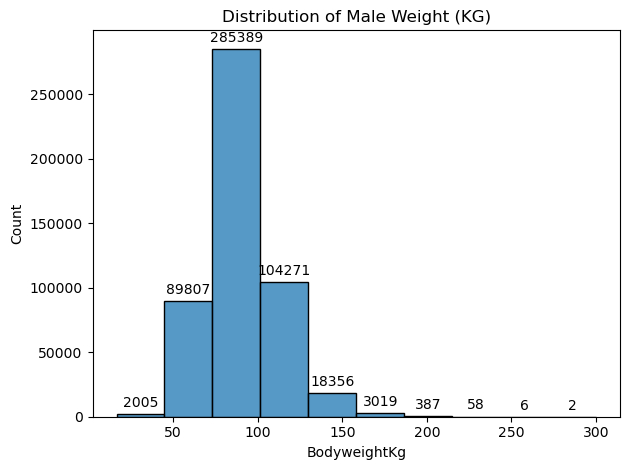

In [7]:
m_weight = sns.histplot(raw_df[raw_df['Sex']=='M']['BodyweightKg'], bins = 10)
plt.title('Distribution of Male Weight (KG)')
for rect in m_weight.patches:
    height = rect.get_height()
    width = rect.get_x() + rect.get_width() / 2
    count = int(height)
    plt.annotate(f'{count}', xy=(width, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

print(np.histogram_bin_edges(raw_df[raw_df['Sex']=='M']['BodyweightKg'], bins=10))
plt.tight_layout()

[ 16.96   36.864  56.768  76.672  96.576 116.48  136.384 156.288 176.192
 196.096 216.   ]


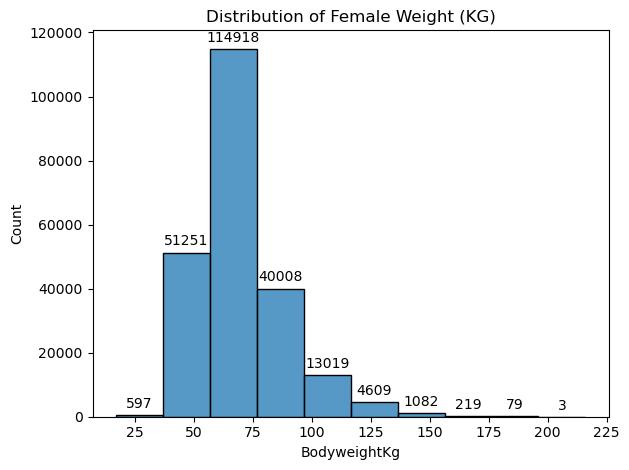

In [8]:
f_weight = sns.histplot(raw_df[raw_df['Sex']=='F']['BodyweightKg'], bins = 10)
plt.title('Distribution of Female Weight (KG)')
for rect in f_weight.patches:
    height = rect.get_height()
    width = rect.get_x() + rect.get_width() / 2
    count = int(height)
    plt.annotate(f'{count}', xy=(width, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Distribution of Female Weight (KG)')
print(np.histogram_bin_edges(raw_df[raw_df['Sex']=='F']['BodyweightKg'], bins=10))
plt.tight_layout()

In [9]:
raw_df['Weight'] = np.where(raw_df['Sex'] == 'F',
         np.where((raw_df['BodyweightKg']>0)&(raw_df['BodyweightKg']<=52),'Light',
                  np.where((raw_df['BodyweightKg']>52)&(raw_df['BodyweightKg']<=63),'Middle',
                           np.where((raw_df['BodyweightKg']>63)&(raw_df['BodyweightKg']<=84),'Heavy',
                                    np.where(raw_df['BodyweightKg']>84,'SuperHeavy','ERROR')))),
         np.where(raw_df['Sex'] == 'M',
                  np.where((raw_df['BodyweightKg']>0)&(raw_df['BodyweightKg']<=66),'Light',
                  np.where((raw_df['BodyweightKg']>66)&(raw_df['BodyweightKg']<=83),'Middle',
                           np.where((raw_df['BodyweightKg']>83)&(raw_df['BodyweightKg']<=105),'Heavy',
                                    np.where(raw_df['BodyweightKg']>105,'SuperHeavy','ERROR')))),'NA'))

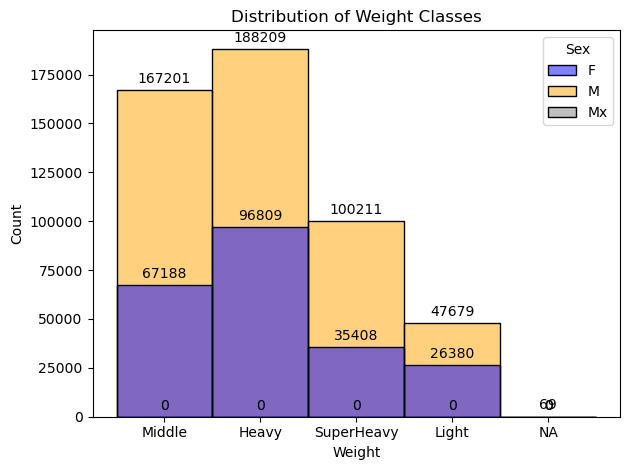

In [10]:
colors = {'F': 'blue', 'M': 'orange','Mx': 'grey'}
palette = [colors[sex] for sex in raw_df['Sex'].unique()]

histogram = sns.histplot(data = raw_df, x = 'Weight', hue = 'Sex',  palette=palette)
for bar in histogram.patches:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    count = int(height)
    plt.annotate(f'{count}', xy=(width, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
plt.title('Distribution of Weight Classes')
plt.tight_layout()

Creating Age Bins
8 Age Brackets using the IPF age categories with life stage cycles.
- (0-15): Teen
- (15-20): Junior
- (20-25): EarlyOpen
- (25-30): Open
- (30-35): LateOpen
- (35-45): EarlyMaster
- (45-55): Master
- (55+): Elder

In [11]:
age_bins = [0, 15, 20, 25, 30, 35, 45, 55, float('inf')]
age_labels = ['Teen', 'Junior', 'EarlyOpen', 'Open', 'LateOpen', 'EarlyMaster','Master','Elder']

raw_df['AgeGroup'] = pd.cut(raw_df['Age'], bins=age_bins, labels=age_labels, right=False)

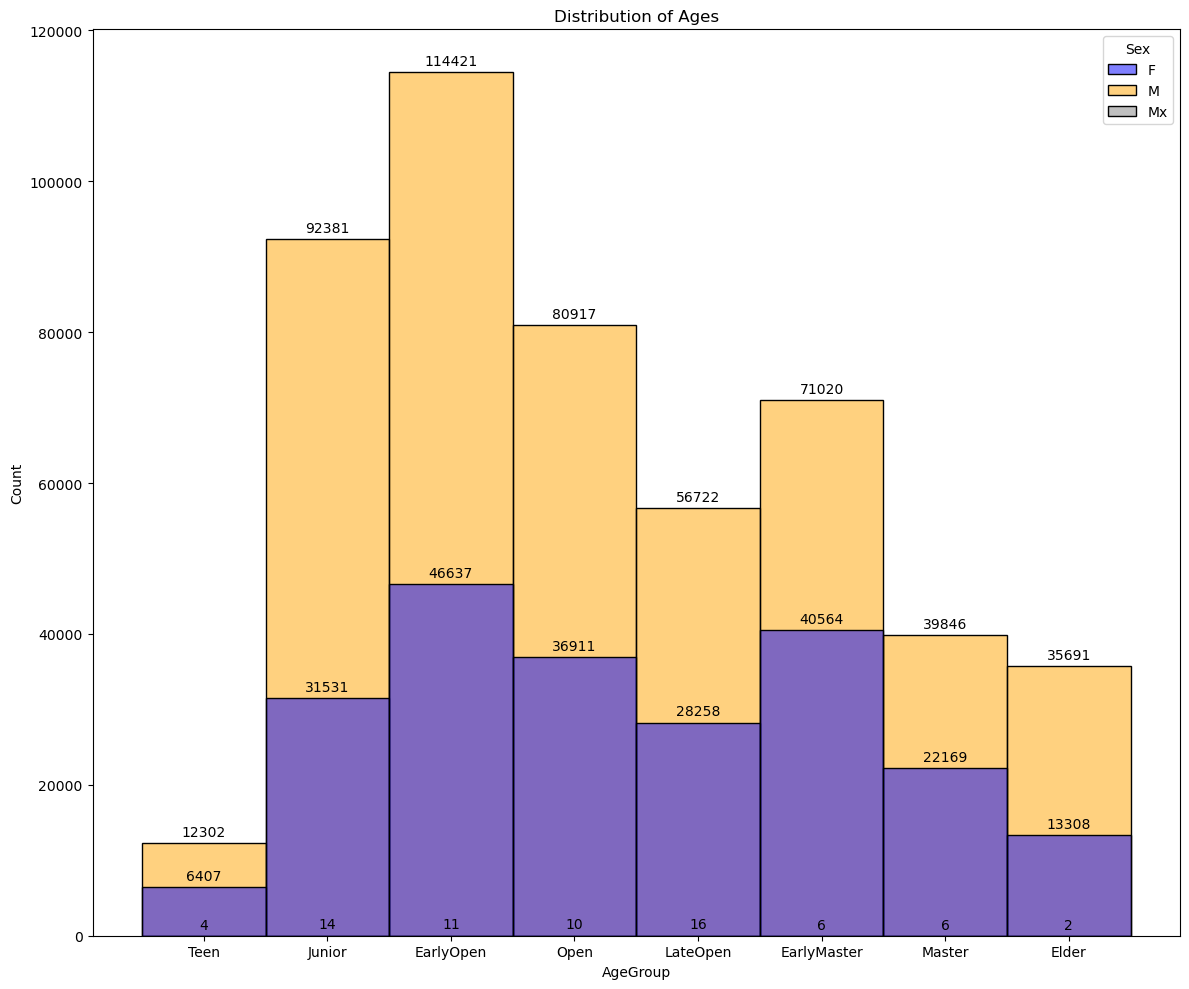

In [12]:
plt.figure(figsize = (12,10))
hist = sns.histplot(data = raw_df, x = 'AgeGroup', hue = 'Sex',  palette=palette)
for bar in hist.patches:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    count = int(height)
    plt.annotate(f'{count}', xy=(width, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
plt.title('Distribution of Ages')
plt.tight_layout()

Final cleaning prior to data exploration and analysis
- Filling in Columns
- Dropping bombouts

In [13]:
raw_df = raw_df[raw_df['Sex'].isin(['F','M'])]

In [14]:
# Filling in Tested null = No
raw_df['Tested'] = raw_df['Tested'].fillna('No')

In [15]:
# Drop bomb outs and ensure at least one of SBD is recorded
raw_df = raw_df[~(raw_df[['Squat','Bench','Dead','Total']].T.isnull().sum()==4)]

# Export

In [16]:
raw_df.to_pickle('model.pkl')

In [17]:
raw_df = raw_df.drop('BodyweightKg', axis = 1)
raw_df.to_pickle('data.pkl')